**Relatório descritivo para processo seletivo de bolsa**

    Nome: César Mâncio Silva
    Email: cesarmanciosilva@usp.br
    Whatsapp: (13) 974030583

A partir do dataset abaixo responder a pergunta: Existe diferença no perfil de candidatos selecionados ou não, considerando as variáveis disponíveis?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('ProcessoSeletivo.csv')
display(data)


,Id_aluno,Selecionado,Sexo,OrientacaoSexual,Idade,Raça-cor,Deficiência
0,6540,Sim,F,Bissexual,25,Amarela,Não possuo
1,16980,Sim,M,Heterossexual,24,Não informada,Não possuo
2,7135,Não,F,Prefiro não responder,22,Branca,Não possuo
3,687,Não,M,Homossexual,20,Preta,Não possuo
4,4387,Sim,F,Heterossexual,21,Branca,Não possuo
...,...,...,...,...,...,...,...
2995,16194,Sim,F,Heterossexual,20,Preta,Não possuo
2996,12865,Sim,M,Heterossexual,19,Branca,Não possuo
2997,5345,Sim,M,Heterossexual,22,Parda,Não possuo
2998,6542,Não,F,Heterossexual,21,Amarela,Não possuo


**Análise 1: Proporção de Gêneros no Processo Seletivo**

Primeiramente, separei os dados em duas categorias: participantes e aprovados. Criei gráficos de barras que ilustram o total de homens e mulheres tanto no total de participantes quanto entre os aprovados. Além disso, utilizei gráficos de setor para representar visualmente a proporção de cada gênero dentro desses dois grupos.

Os resultados revelaram que a proporção de homens e mulheres entre os participantes foi consistentemente refletida entre os aprovados. Em outras palavras, a proporção de homens e mulheres que participaram do processo seletivo foi aproximadamente a mesma na fase de aprovação. Este achado indica que a distribuição de gêneros foi mantida ao longo do processo, sugerindo que não houve viés de gênero na seleção final dos candidatos.

Essa análise proporciona uma visão clara e objetiva sobre a equidade de gênero no processo seletivo, evidenciando que a seleção dos candidatos aprovados foi representativa da composição inicial dos participantes. A uniformidade nas proporções entre os grupos de participantes e aprovados pode ser um indicativo positivo de que o processo seletivo foi conduzido de maneira justa e imparcial.

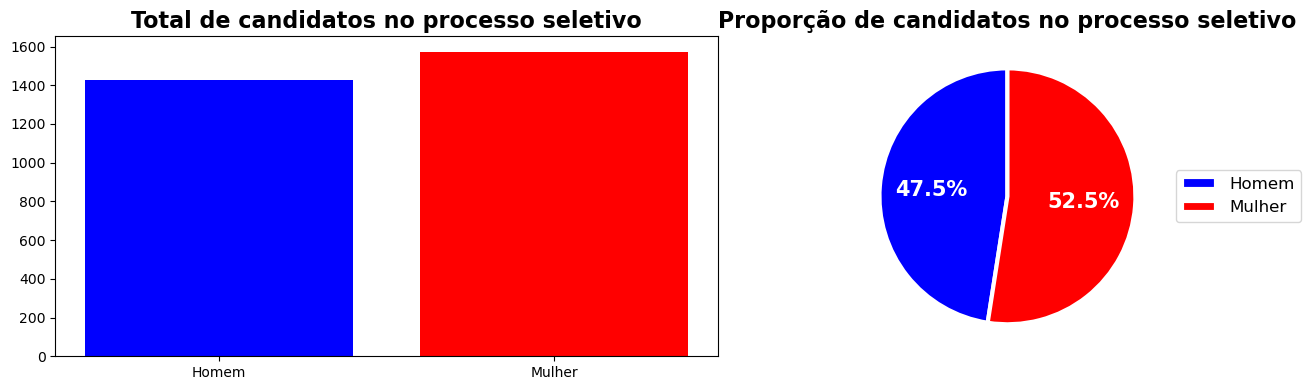

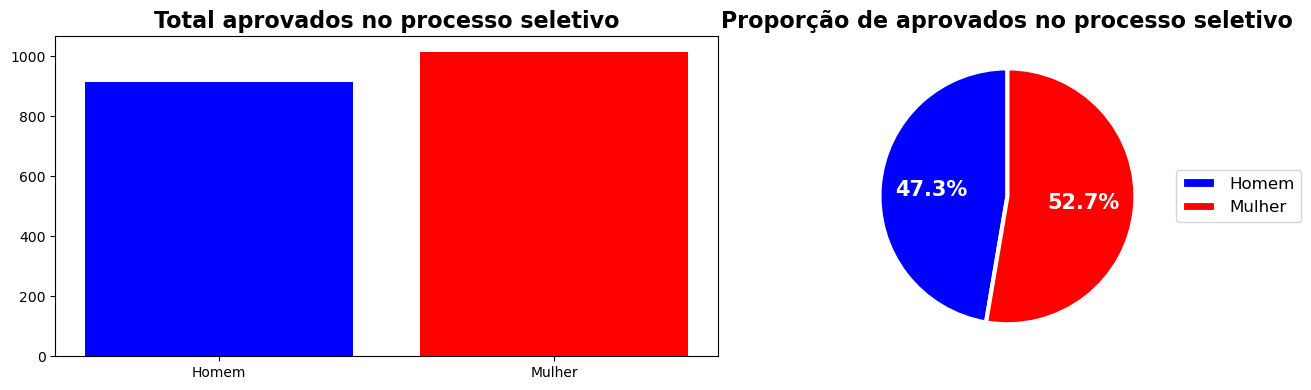

In [19]:
mulher_total = len(data.query("Sexo == 'F' "))
homem_total = len(data.query("Sexo == 'M' "))

x = ['Homem','Mulher']
y = [homem_total,mulher_total]

homem_aprovado = len(data.query("Sexo=='M' and Selecionado=='Sim'"))
mulher_aprovado = len(data.query("Sexo=='F' and Selecionado=='Sim'"))

k = [homem_aprovado,mulher_aprovado]

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].bar(x, y, color=['blue','red'])
ax[0].set_title('Total de candidatos no processo seletivo',fontsize=16,fontweight='bold')

wedges, texts, autotexts = ax[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','red'])
ax[1].legend(wedges, x, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(15)    # Tamanho da fonte
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color('white')
ax[1].set_title('Proporção de candidatos no processo seletivo',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].bar(x, k, color=['blue','red'])
ax[0].set_title('Total aprovados no processo seletivo',fontsize=16,fontweight='bold')

wedges, texts, autotexts = ax[1].pie(k, labels=x, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','red'])
ax[1].legend(wedges, x, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(15)    # Tamanho da fonte
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color('white')
ax[1].set_title('Proporção de aprovados no processo seletivo',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()





**Análise 2: Proporção de raça no Processo Seletivo**

***a) Mudança na Representatividade de Brancos:***

A proporção de candidatos brancos no total é de 53.2%, mas entre os selecionados é de 47.2%. Isso indica uma redução na proporção de brancos ao longo do processo seletivo. A seleção parece estar mais alinhada com a proporção geral de candidatos pardos e pretos, sugerindo uma tentativa de diversificação.

***b) Maior Inclusão de Pardos e Pretos:***

Pardos: A proporção de candidatos pardos no total é de 29.3%, enquanto entre os selecionados é de 33.0%. O aumento na proporção de pardos selecionados sugere que este grupo pode estar melhor representado entre os aprovados do que entre os candidatos.
    
Pretos: A proporção de candidatos pretos é de 11.1%, e entre os selecionados é de 13.6%. Similar aos pardos, a proporção de candidatos pretos aumenta entre os selecionados, indicando uma possível política ou tendência de maior inclusão desses grupos.

***c) Estabilidade dos Candidatos com Raça Não Informada:***

A proporção de candidatos com raça não informada é de 4.2% no total e 4.4% entre os selecionados, mostrando pouca variação. Isso sugere que a falta de informação sobre raça não impactou significativamente a seleção.

***d) Sub-representação Persistente de Amarelos e Indígenas:***

Amarelos: A proporção de candidatos amarelos é de 2.1% e entre os selecionados é de 1.7%. A leve diminuição indica uma sub-representação consistente ao longo do processo.

Indígenas: A proporção de candidatos indígenas é muito pequena tanto no total (0.1%) quanto entre os selecionados (0.05%). A presença quase nula sugere uma sub-representação significativa, que pode exigir atenção específica para garantir uma maior inclusão desses grupos.

***e) Impacto da Seleção na Diversidade:***

A análise sugere que o processo seletivo tem um impacto positivo na diversidade racial ao aumentar a proporção de candidatos pardos e pretos selecionados em comparação com sua proporção entre os candidatos. Isso pode indicar que o processo seletivo pode ter mecanismos para promover a equidade racial.

***f) Possíveis Áreas de Melhoria:***

Aumentar a Representatividade de Grupos Menores: A contínua sub-representação de candidatos amarelos e indígenas pode necessitar de programas específicos para promover maior inclusão e oportunidades para esses grupos.
    
Avaliar Critérios de Seleção: Reavaliar os critérios e práticas de seleção para garantir que todos os grupos raciais estejam adequadamente representados e que não haja barreiras inadvertidas para a participação desses grupos.

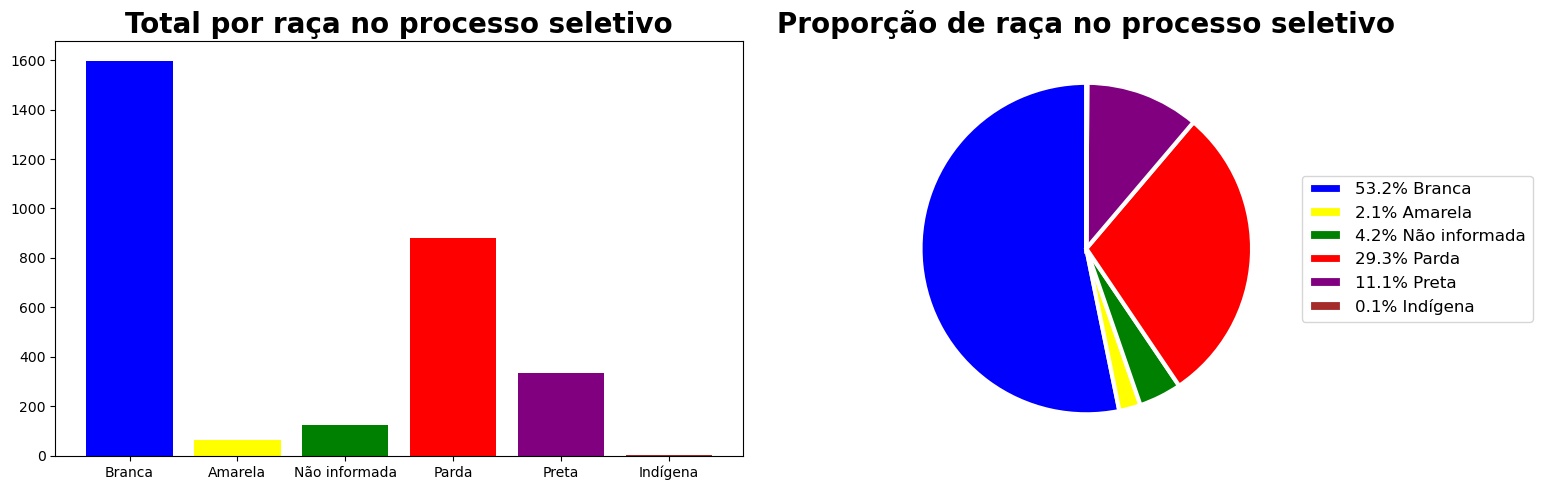

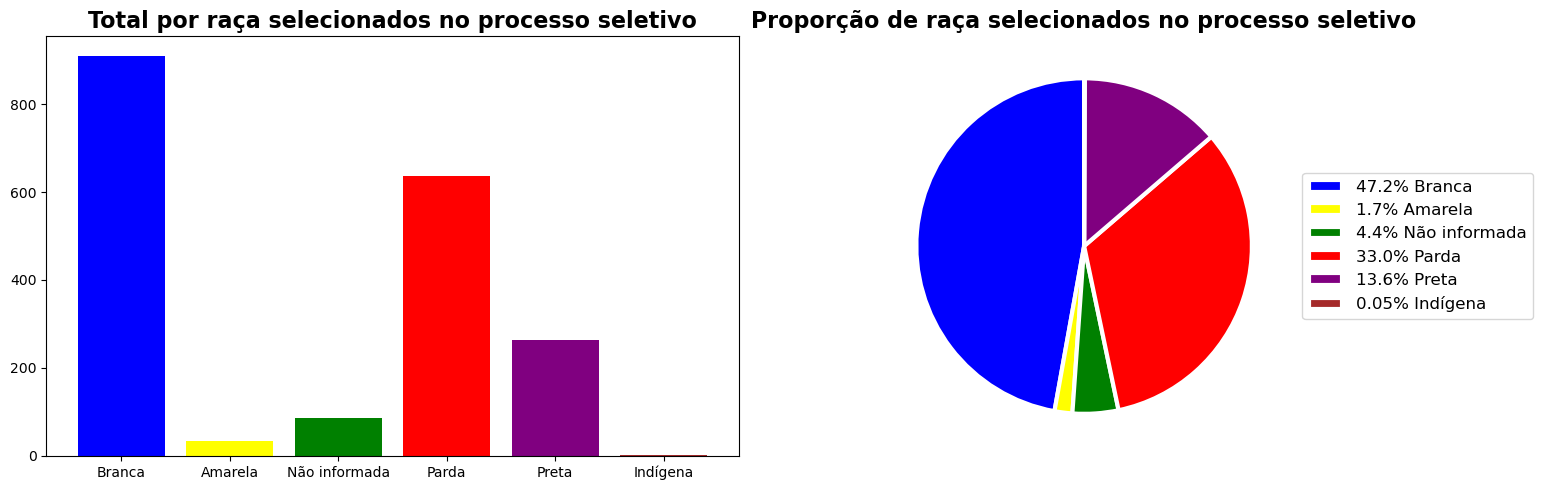

In [14]:
data_raça=data.groupby('Raça-cor')
raça_Branca = data_raça.get_group('Branca')
raça_Amarela= data_raça.get_group('Amarela')
raça_Indigena = data_raça.get_group('Indígena')
raça_NI = data_raça.get_group('Não informada')
raça_Parda = data_raça.get_group('Parda')
raça_Preta = data_raça.get_group('Preta')

total_integrantes = len(data)

prct_branca = (len(raça_Branca)*100)/total_integrantes
prct_amarela = (len(raça_Amarela)*100)/total_integrantes
prct_ni = (len(raça_NI)*100)/total_integrantes
prct_parda = (len(raça_Parda)*100)/total_integrantes
prct_preta = (len(raça_Preta)*100)/total_integrantes
prct_indigena = (len(raça_Indigena)*100)/total_integrantes

raças = ['Branca','Amarela','Não informada','Parda','Preta','Indígena']
raças_prct = [f'{prct_branca}% Branca',f'{prct_amarela}% Amarela',f'{round(prct_ni,1)}% Não informada',f'{round(prct_parda,1)}% Parda',f'{prct_preta}% Preta',f'{prct_indigena}% Indígena']
result = [len(raça_Branca),len(raça_Amarela),len(raça_NI),len(raça_Parda),len(raça_Preta),len(raça_Indigena)]

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].bar(raças,result,color=['blue','yellow','green','red','purple','brown'])
ax[0].set_title('Total por raça no processo seletivo',fontsize=20,fontweight='bold')

wedges, texts, autotexts = ax[1].pie(result, labels=raças_prct, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','yellow','green','red','purple','brown'])
ax[1].legend(wedges, raças_prct, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(1)   
    x, y = autotext.get_position()
    horizontal_offset = 2* x
    vertical_offset = 2 * y
    autotext.set_position((horizontal_offset, vertical_offset))
    
for text in texts:
    text.set_color('white')
ax[1].set_title('Proporção de raça no processo seletivo',fontsize=20,fontweight='bold')
fig.subplots_adjust()
plt.tight_layout()
plt.show()

total_integrantes_selecionado = len(data.query('Selecionado == "Sim"'))
prct_branca_selecionado = (len(raça_Branca.query('Selecionado == "Sim"'))*100)/total_integrantes_selecionado
prct_amarela_selecionado = (len(raça_Amarela.query('Selecionado == "Sim"'))*100)/total_integrantes_selecionado
prct_ni_selecionado = (len(raça_NI.query('Selecionado == "Sim"'))*100)/total_integrantes_selecionado
prct_parda_selecionado = (len(raça_Parda.query('Selecionado == "Sim"'))*100)/total_integrantes_selecionado
prct_preta_selecionado = (len(raça_Preta.query('Selecionado == "Sim"'))*100)/total_integrantes_selecionado
prct_indigena_selecionado = (len(raça_Indigena.query('Selecionado == "Sim"'))*100)/total_integrantes_selecionado

raças_prct_selecionado = [f'{round(prct_branca_selecionado,1)}% Branca',f'{round(prct_amarela_selecionado,1)}% Amarela',f'{round(prct_ni_selecionado,1)}% Não informada',f'{round(prct_parda_selecionado,1)}% Parda',f'{round(prct_preta_selecionado,1)}% Preta',f'{round(prct_indigena_selecionado,2)}% Indígena']
result2 = [len(raça_Branca.query('Selecionado == "Sim"')),len(raça_Amarela.query('Selecionado == "Sim"')),len(raça_NI.query('Selecionado == "Sim"')),len(raça_Parda.query('Selecionado == "Sim"')),len(raça_Preta.query('Selecionado == "Sim"')),len(raça_Indigena.query('Selecionado == "Sim"'))]

fig, bx = plt.subplots(1, 2, figsize=(16, 5))
bx[0].bar(raças,result2,color=['blue','yellow','green','red','purple','brown'])
bx[0].set_title('Total por raça selecionados no processo seletivo',fontsize=16,fontweight='bold')

wedges, texts, autotexts = bx[1].pie(result2, labels=raças_prct_selecionado, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','yellow','green','red','purple','brown'])
bx[1].legend(wedges, raças_prct_selecionado, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(1)   
    x, y = autotext.get_position()
    horizontal_offset = 2* x
    vertical_offset = 2 * y
    autotext.set_position((horizontal_offset, vertical_offset))
    
for text in texts:
    text.set_color('white')
bx[1].set_title('Proporção de raça selecionados no processo seletivo',fontsize=16,fontweight='bold')
fig.subplots_adjust()
plt.tight_layout()
plt.show()



**Analise 3:Proporção na idade no processo seletivo**

***Hipótese***
    A hipótese inicial era que a idade dos candidatos poderia influenciar a seleção no processo seletivo. Se a idade fosse um fator determinante, esperaríamos ver diferenças na distribuição etária entre todos os candidatos e os candidatos aprovados.

***Resultados***
    Os histogramas mostram que a distribuição etária dos candidatos e a dos candidatos aprovados apresentam a mesma proporção. Isso sugere que as proporções de idade são consistentes entre os grupos.

***Conclusão***
    A análise dos histogramas indica que a proporção de idades entre todos os candidatos e os candidatos aprovados é aproximadamente a mesma, o que pode sugerir que a idade não foi um fator discriminante significativo. No entanto, essa proporcionalidade pode também indicar um esforço intencional para manter a diversidade etária entre os aprovados, refletindo uma abordagem de seleção que visa preservar uma representação equilibrada de diferentes faixas etárias. Assim, a conclusão é que, embora a idade não tenha sido um critério determinante explícito, a seleção pode ter sido realizada de forma a garantir uma diversidade etária proporcional.

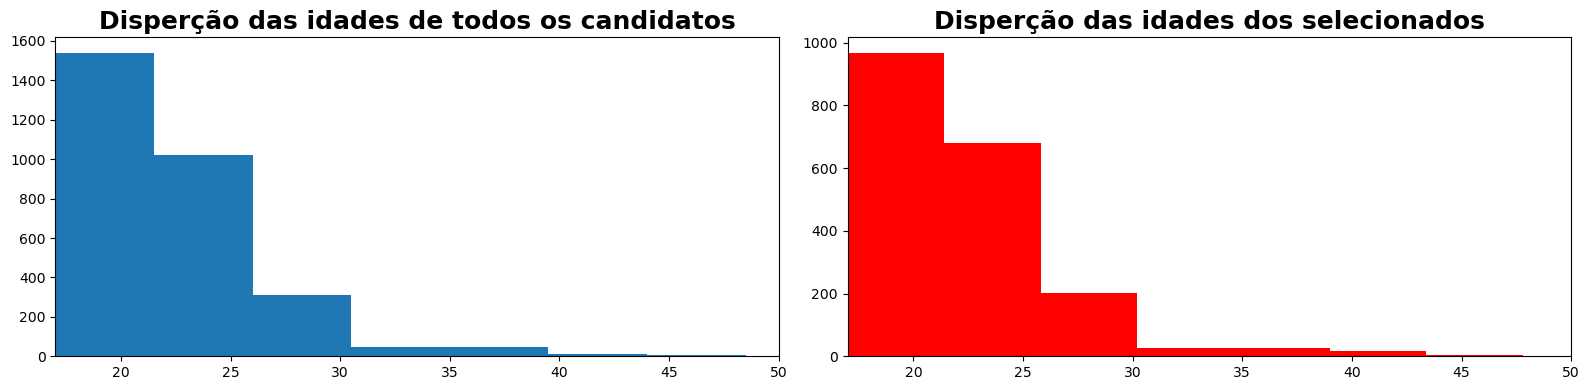

Média de idade de todos os candidatos: 22.4 
Média de idade dos candidatos selecionados: 22.3 


In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].hist(data['Idade'],linewidth=0.5)
ax[0].set_xlim(min(data['Idade']),50)
ax[0].set_title("Disperção das idades de todos os candidatos",fontsize=18,fontweight='bold')


ax[1].hist(data.query('Selecionado == "Sim"')['Idade'],color='red')
ax[1].set_xlim(min(data['Idade']),50)
ax[1].set_title("Disperção das idades dos selecionados",fontsize=18,fontweight='bold')
fig.subplots_adjust()
plt.tight_layout()
plt.show()

print(f'Média de idade de todos os candidatos: {round(data['Idade'].mean(),1)} ')
print(f'Média de idade dos candidatos selecionados: {round(data.query('Selecionado == "Sim"')['Idade'].mean(),1)} ')


**Conclusão Geral da Análise do Processo Seletivo**

A análise detalhada das proporções de gênero, raça e idade no processo seletivo oferece uma visão abrangente da equidade e da diversidade na seleção de candidatos.

***1. Proporção de Gêneros***

A análise dos gráficos de barras e de setor revela que a proporção de homens e mulheres foi consistentemente refletida entre os participantes e os aprovados. Essa uniformidade sugere que o processo seletivo foi conduzido de maneira justa, sem viés de gênero, e que a composição dos aprovados representa fielmente a composição inicial dos candidatos.

***2. Proporção de Raça***

Mudança na Representatividade de Brancos: Observou-se uma redução na proporção de brancos entre os aprovados, o que sugere uma tentativa de diversificação no processo seletivo.

Maior Inclusão de Pardos e Pretos: A análise mostra um aumento na proporção de candidatos pardos e pretos entre os aprovados, indicando uma política de inclusão mais eficaz para esses grupos.

Estabilidade dos Candidatos com Raça Não Informada: A proporção relativamente constante de candidatos com raça não informada sugere que a falta de informação não impactou significativamente a seleção.

Sub-representação Persistente de Amarelos e Indígenas: Apesar da tentativa de diversificação, a sub-representação de candidatos amarelos e indígenas persiste, destacando a necessidade de ações específicas para melhorar a inclusão desses grupos.

***3. Proporção de Idade***

A distribuição etária dos candidatos e dos aprovados é consistente, sugerindo que a idade não foi um critério discriminante significativo. No entanto, essa proporcionalidade também pode refletir um esforço consciente para manter a diversidade etária, indicando que o processo seletivo pode ter sido projetado para garantir uma representação equilibrada das faixas etárias.

**Considerações Finais**

A análise geral indica que o processo seletivo foi conduzido de maneira justa e equitativa em relação ao gênero e à idade, mantendo a proporção inicial entre participantes e aprovados. Em termos de diversidade racial, embora tenha havido um avanço na inclusão de pardos e pretos, a sub-representação de amarelos e indígenas sugere áreas que necessitam de mais atenção e possíveis ajustes.

**Existe diferença no perfil de candidatos selecionados ou não, considerando as variáveis disponíveis?**

Sim, com base nas análises realizadas, podemos observar diferenças no perfil dos candidatos selecionados em comparação com os não selecionados. 

Dado o padrão observado, é plausível que o processo seletivo tenha buscado promover a diversidade entre os selecionados. Se esse padrão de inclusão for consistente, é provável que análises semelhantes de outras características demográficas, como a orientação sexual, revelem que a proporção dos candidatos selecionados se aproxima daquela encontrada entre todos os candidatos. A manutenção de uma diversidade representativa pode ser uma prioridade contínua na seleção, sugerindo que o padrão observado é parte de uma estratégia mais ampla para promover a inclusão e a equidade

Em suma, a análise sugere que o processo seletivo foi, em grande parte, justo e representativo, mas também destaca áreas para melhoria contínua na promoção da diversidade e inclusão. A hipótese dedutiva indica que a busca por diversidade pode ser um fator subjacente a este processo, refletindo um compromisso com uma seleção inclusiva e equitativa.
